In [1]:
import import_ipynb
import pandas as pd

import sbemdb
import mapping
import confidence
import pickle
import trials
from cleandb import clean_db, clean_db_uct
from get_tree_ids import get_tree_ids
# modified in trials:
# import em170428.salpa --> salpa
# line 77: s = em170428.salpa.Salpa(tau=tau) --> s = salpa.Salpa(tau=tau)

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
db = sbemdb.SBEMDB()
db = clean_db(db) 
x,y,z = db.segments(444)
mp = mapping.Mapping()

trees Before 398
trees After 46
nodes Before 37481
nodes After 16320
nodecons Before 73994
nodecons After 32548
syncons Before 1199
syncons After 826
synapses Before 552
synapses After 535


In [3]:
node_ids_db = list(db.nodeDetails('tid==444 and typ=6').keys())
segments = pd.read_csv('segments_table.csv')

In [4]:
all_tids = get_tree_ids(db)

In [5]:
syn_types = pd.read_csv(r"C:\Users\Amanda P\Desktop\SURF\leechem-public\new\leechem-public\data\tree_sids.csv", r"tree_sids.csv", header=None, engine='python')
tree_syn_types = {} # 0: N/A, 1: excitatory, -1: inhibitory
for i, item in syn_types.itertuples():
    tree_syn_types[int(item.split(',')[0])] = int(item.split(',')[1])

In [6]:
syn_type_total = [0, 0, 0] # inhib, exci, unknown
syn_type_dict = {-1:0, 1:1, 0:2, None:2}
for tid in all_tids:
    _x, _y, _z, _, _, _sid, _pre_nid, _post_nid = db.synapses(f'pre.tid={tid} and post.tid=444', extended=True)
    syn_type_total[syn_type_dict[tree_syn_types.get(tid)]] += len(_sid)
    
inhib_ratio_overall, exci_ratio_overall, unknown_ratio_overall = syn_type_total[0]/sum(syn_type_total), syn_type_total[1]/sum(syn_type_total), syn_type_total[2]/sum(syn_type_total)
# 0.249, 0.281, 0.470

In [7]:
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
cluster_params = load_obj('saved_param_clusters_path_2-5')

In [8]:
syn_x, syn_y, syn_z, _tid, _, _sid, _pre_nid, _post_nid = db.synapses(f'post.tid=444', extended=True) 
tree_ids = np.unique(_tid)
syn_types = pd.read_csv(r"C:\Users\Amanda P\Desktop\SURF\leechem-public\new\leechem-public\data\tree_sids.csv", r"tree_sids.csv", header=None, engine='python')
tree_syn_types = {}
for i, item in syn_types.itertuples():
    tree_syn_types[int(item.split(',')[0])] = int(item.split(',')[1])

# Trial 6

In [9]:
trial_number = 6
tr = trials.Trial(trial_number)

Trial 6 download complete                     


In [10]:
tt = tr.vsd().timestamps()[0]
roiid = mp.mapCanonicalNameToROIID('3_R')
dff = tr.vsd().trace(roiid)[0]

Text(0.5, 1.0, 'VSD trace of DE-3(R) during swim trial #6')

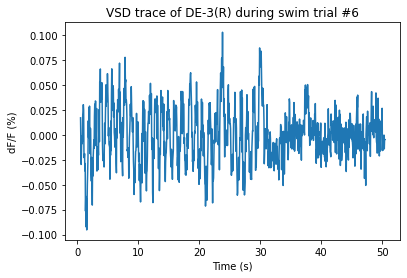

In [11]:
plt.interactive(True)
plt.figure()
plt.plot(tt, dff)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title(f'VSD trace of DE-3(R) during swim trial #{trial_number}')

In [12]:
# Get list of all trees presynaptic to DE-3
pretrees = db.presyntrees()

# Construct a dict of ROI IDs associated with those trees and a dict mapping
# ROI IDs to synapse counts
roimap = {}
syncount = {}
for tid in pretrees.keys():    
    roi = mp.mapTreeIDToROIID(tid)
    if roi is not None:
        roimap[roi] = tid
        syncount[roi] = pretrees[tid][0]

In [13]:
# Get ROI IDs in order of decreasing synapse counts
rois = list(syncount.keys())
counts = [syncount[roi] for roi in rois]
ordr = np.argsort(counts)
rois = [rois[k] for k in ordr][::-1]
counts = [counts[k] for k in ordr][::-1]

# Retrieve identity of most highly connected neuron
name = mp.mapROIIDToCanonicalName(rois[0]) # 6: 1_R

In [14]:
'''
need systematic method to identify clusters
'''
clusters_vis = cluster_params[(5, 50)]['clusters'] # 63 swimming, Nearest Neighbor, extent
tr_6_tree_vsd = {}     
clust_id = 0
for clust in clusters_vis:
    tr_6_tree_vsd[clust_id] = []
    tid = [_tid[np.where(_sid == id.sid)[0][0]] for id in clust]
    for t_id in tid:
        tr_6_tree_vsd[clust_id].append((t_id, (tr.vsd().trace(mp.mapTreeIDToROIID(t_id))[0]))) 
    clust_id += 1

Text(0.5, 1.0, 'VSD trace of 1_R during swim trial #6')

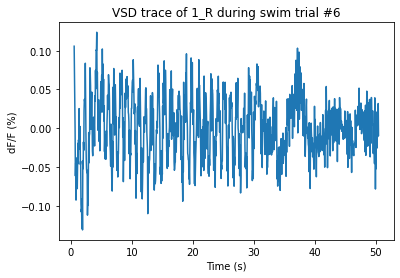

In [16]:
# Plot its activity over the previous trace
dff=tr.vsd().trace(rois[0])[0] # can change graph to be of any tid by rois[i]         
plt.close()
plt.plot(tt, dff)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title(f'VSD trace of {name} during swim trial #{trial_number}')

# Trial 15

In [17]:
plt.close()

trial_number = 15
tr = trials.Trial(trial_number)

Trial 15 download complete                     


In [18]:
tt = tr.vsd().timestamps()[0]
roiid = mp.mapCanonicalNameToROIID('3_R')
dff = tr.vsd().trace(roiid)[0]    

Text(0.5, 1.0, 'VSD trace of DE-3(R) during crawl trial #15')

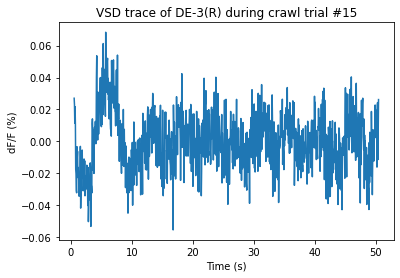

In [19]:
plt.interactive(True)
plt.figure()
plt.plot(tt, dff)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title(f'VSD trace of DE-3(R) during crawl trial #{trial_number}')

In [20]:
# Get list of all trees presynaptic to DE-3
pretrees = db.presyntrees()

# Construct a dict of ROI IDs associated with those trees and a dict mapping
# ROI IDs to synapse counts
roimap = {}
syncount = {}
for tid in pretrees.keys():
    roi = mp.mapTreeIDToROIID(tid)
    if roi is not None:
        roimap[roi] = tid
        syncount[roi] = pretrees[tid][0]

In [21]:
# Get ROI IDs in order of decreasing synapse counts
rois = list(syncount.keys())
counts = [syncount[roi] for roi in rois]
ordr = np.argsort(counts)
rois = [rois[k] for k in ordr][::-1]
counts = [counts[k] for k in ordr][::-1]

# Retrieve identity of most highly connected neuron
name = mp.mapROIIDToCanonicalName(rois[0]) # 15: 1_R

In [22]:
clusters_vis = cluster_params[(7.5, 15)]['clusters'] # 153 crawling
tr_15_tree_vsd = {}        
clust_id = 30
for clust in clusters_vis:
    tr_15_tree_vsd[clust_id] = []
    tid = [_tid[np.where(_sid == id.sid)[0][0]] for id in clust]    
    for t_id in tid:
        tr_15_tree_vsd[clust_id].append((t_id, (tr.vsd().trace(mp.mapTreeIDToROIID(t_id))[0]))) 
    clust_id += 1

Text(0.5, 1.0, 'VSD trace of 1_R during crawl trial #15')

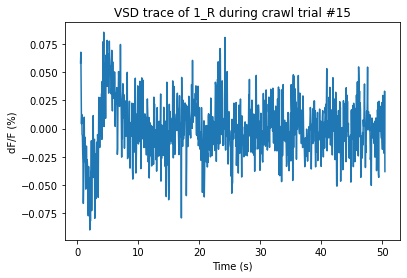

In [23]:
# Plot its activity over the previous trace
dff=tr.vsd().trace(rois[0])[0]                  
plt.close()                        
plt.plot(tt, dff)
plt.xlabel('Time (s)')
plt.ylabel('dF/F (%)')
plt.title(f'VSD trace of {name} during crawl trial #{trial_number}')